In [104]:
'''Data Collection'''

'Data Collection'

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
health_assist = pd.read_csv("survey.csv")

In [107]:
health_assist.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [108]:
'''Data Cleaning'''

'Data Cleaning'

In [109]:
health_assist.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [110]:
health_assist = health_assist.drop(['Timestamp','Country','state','no_employees','care_options','wellness_program','seek_help','leave','coworkers','supervisor','mental_health_interview','phys_health_interview','comments'], axis = 1)

In [111]:
health_assist = health_assist.rename(columns = {'mental_health_consequence':'mental_health','phys_health_consequence':'phys_health','obs_consequence':'observation_result'})

In [112]:
health_assist.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,anonymity,mental_health,phys_health,mental_vs_physical,observation_result
0,37,Female,NaN,No,Yes,Often,No,Yes,Yes,Yes,No,No,Yes,No
1,44,M,NaN,No,No,Rarely,No,No,Don't know,Don't know,Maybe,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,No,Yes,No,Don't know,No,No,No,No
3,31,Male,NaN,Yes,Yes,Often,No,Yes,No,No,Yes,Yes,No,Yes
4,31,Male,NaN,No,No,Never,Yes,Yes,Yes,Don't know,No,No,Don't know,No


In [113]:
health_assist.shape

(1259, 14)

In [114]:
health_assist.isnull().sum()

Age                     0
Gender                  0
self_employed          18
family_history          0
treatment               0
work_interfere        264
remote_work             0
tech_company            0
benefits                0
anonymity               0
mental_health           0
phys_health             0
mental_vs_physical      0
observation_result      0
dtype: int64

In [115]:
health_assist['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [116]:
def cat_os(input):
  if input == 'Male' or input == 'male' or input == 'M' or input == 'm' or input == 'Make' or input == 'Cis Male' or input == 'Mail' or input == 'Malr' or input == 'Cis Man' or input == 'Male-ish' or input == 'maile' or input == 'something kinda male?'or input == 'Mal' or input == 'Male (CIS)' or input == 'ostensibly male, unsure what that really means':
    return 'Male'
  elif input == 'Female' or input == 'female' or input == 'F' or input == 'f' or input == 'Woman' or input == '' or input == 'cis-female/femme' or input == 'Female' or input == 'cis-female/femme' or input == 'femail':
    return 'Female'
  else:
    return 'Others'

In [117]:
health_assist['Gender'] = health_assist['Gender'].apply(cat_os)

In [118]:
health_assist['Gender']

0       Female
1         Male
2         Male
3         Male
4         Male
         ...  
1254      Male
1255      Male
1256      Male
1257    Female
1258      Male
Name: Gender, Length: 1259, dtype: object

In [119]:
health_assist['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [120]:
health_assist['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [121]:
health_assist = health_assist.dropna()

In [122]:
health_assist.isnull().sum()

Age                   0
Gender                0
self_employed         0
family_history        0
treatment             0
work_interfere        0
remote_work           0
tech_company          0
benefits              0
anonymity             0
mental_health         0
phys_health           0
mental_vs_physical    0
observation_result    0
dtype: int64

In [123]:
health_assist.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,anonymity,mental_health,phys_health,mental_vs_physical,observation_result
18,46,Male,Yes,Yes,No,Sometimes,Yes,Yes,Yes,Yes,No,No,Yes,Yes
20,29,Male,No,Yes,Yes,Sometimes,No,Yes,Yes,No,Maybe,No,No,No
21,31,Male,Yes,No,No,Never,Yes,Yes,No,Yes,No,No,Yes,No
22,46,Male,No,No,Yes,Often,Yes,Yes,Yes,Don't know,Maybe,No,No,No
23,41,Male,No,No,Yes,Never,No,No,Don't know,Don't know,Maybe,No,Don't know,No


In [124]:
health_assist.shape

(977, 14)

In [125]:
health_assist = health_assist.apply(lambda x: x.replace({"Don't know":'Dont Know'}, regex=True))

In [126]:
health_assist['benefits'].value_counts()

Yes          399
No           291
Dont Know    287
Name: benefits, dtype: int64

In [127]:
health_assist['anonymity'].value_counts()

Dont Know    624
Yes          299
No            54
Name: anonymity, dtype: int64

In [128]:
health_assist['mental_health'].value_counts()

Maybe    376
No       343
Yes      258
Name: mental_health, dtype: int64

In [129]:
health_assist['phys_health'].value_counts()

No       700
Maybe    221
Yes       56
Name: phys_health, dtype: int64

In [130]:
health_assist['mental_vs_physical'].value_counts()

Dont Know    428
No           282
Yes          267
Name: mental_vs_physical, dtype: int64

In [131]:
'''Exploratory data analysis (EDA)'''

'Exploratory data analysis (EDA)'

<Axes: >

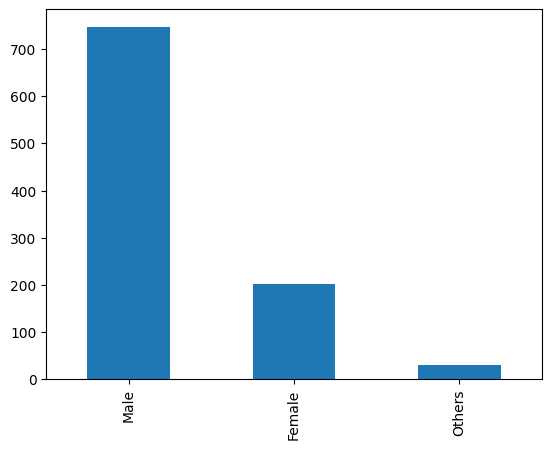

In [132]:
health_assist['Gender'].value_counts().plot(kind = 'bar')

<Axes: >

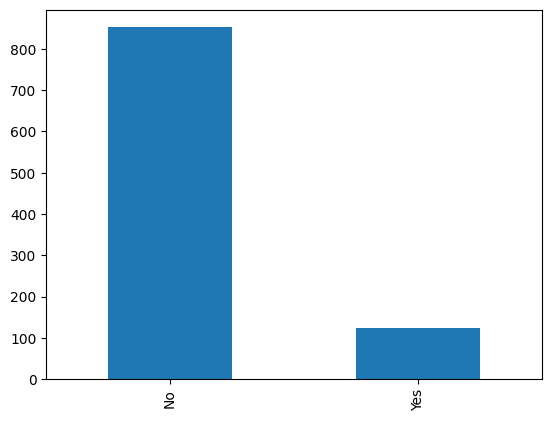

In [133]:
health_assist['self_employed'].value_counts().plot(kind = 'bar')

<Axes: >

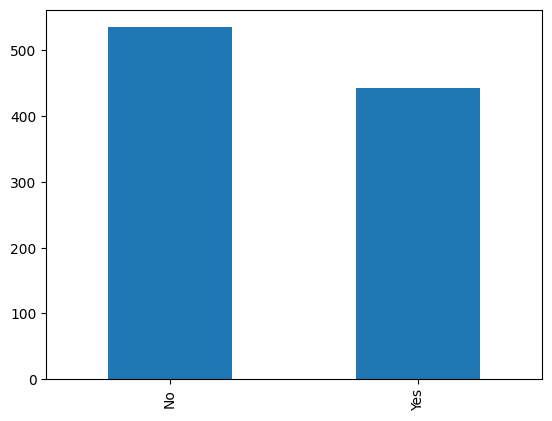

In [134]:
health_assist['family_history'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Gender', ylabel='count'>

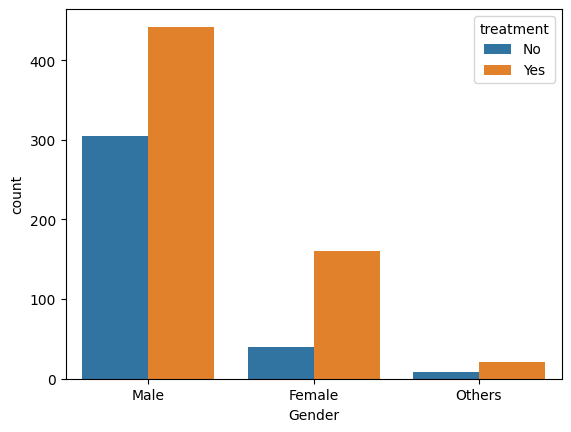

In [135]:
sns.countplot(x = 'Gender', hue = 'treatment', data = health_assist)

<Axes: xlabel='Gender', ylabel='count'>

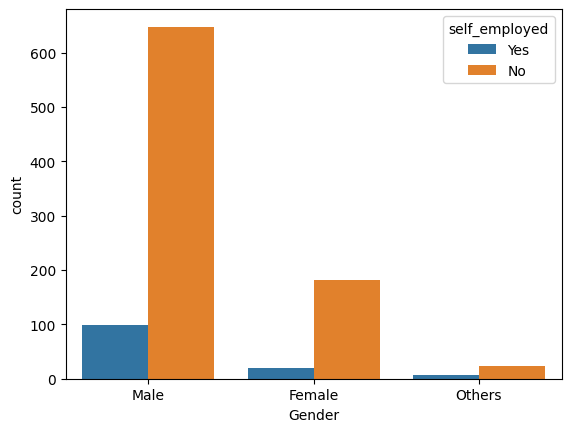

In [136]:
sns.countplot(x = 'Gender', hue = 'self_employed', data = health_assist)

<Axes: xlabel='Gender', ylabel='count'>

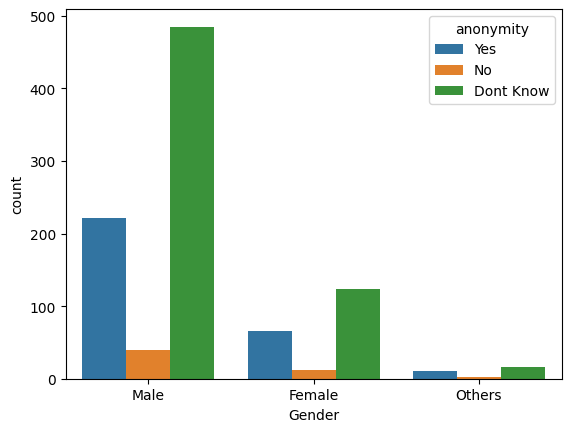

In [137]:
sns.countplot(x = 'Gender', hue = 'anonymity', data = health_assist)

<Axes: xlabel='Gender', ylabel='count'>

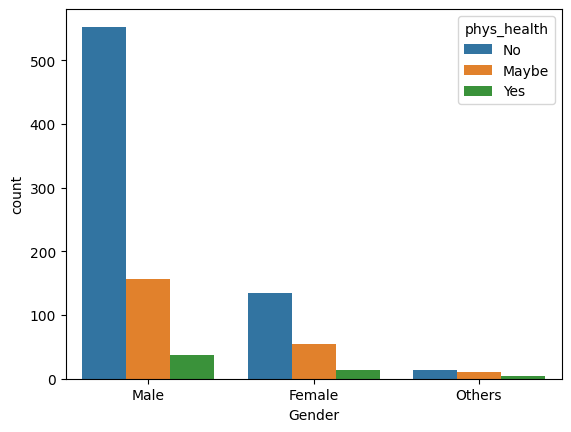

In [138]:
sns.countplot(x = 'Gender', hue = 'phys_health', data = health_assist)

<Axes: xlabel='Gender', ylabel='count'>

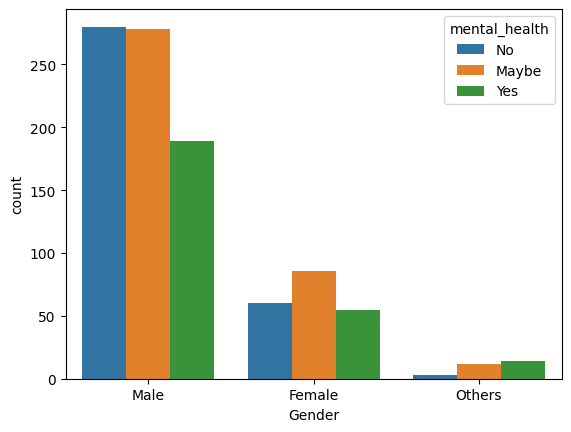

In [139]:
sns.countplot(x = 'Gender', hue = 'mental_health', data = health_assist)

<Axes: xlabel='Gender', ylabel='count'>

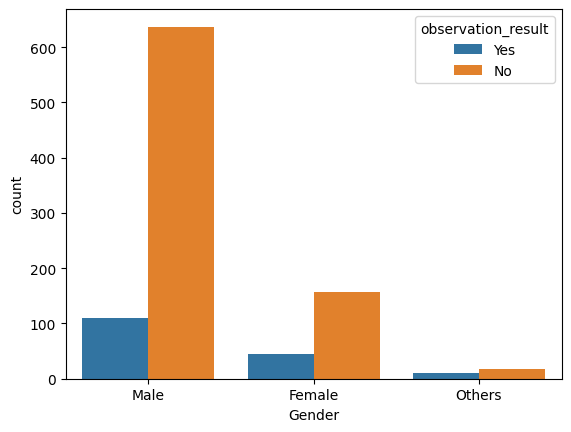

In [140]:
sns.countplot(x = 'Gender', hue = 'observation_result', data = health_assist)

In [141]:
health_assist.replace({'Gender' : {'Male':0, 'Female':1, 'Others':2},
                       'self_employed' : {'No':0, 'Yes':1},
                       'family_history' : {'No':0, 'Yes':1},
                       'treatment' : {'No':0, 'Yes':1},
                       'work_interfere' : {'Sometimes':0, 'Never':1, 'Rarely':2, 'Often':3},
                       'remote_work': {'No':0, 'Yes':1},
                       'tech_company': {'No':0, 'Yes':1},
                       'benefits' : {'No':0, 'Yes':1, "Dont Know":2},
                       'anonymity': {'No':0, 'Yes':1, "Dont Know":2},
                       'mental_health': {'No':0, 'Yes':1, 'Maybe':2},
                       'phys_health': {'No':0, 'Yes':1, 'Maybe':2},
                       'mental_vs_physical': {'No':0, 'Yes':1, "Dont Know":2},
                       'observation_result': {'No':0, 'Yes':1},}, inplace=True)

In [142]:
health_assist.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,anonymity,mental_health,phys_health,mental_vs_physical,observation_result
18,46,0,1,1,0,0,1,1,1,1,0,0,1,1
20,29,0,0,1,1,0,0,1,1,0,2,0,0,0
21,31,0,1,0,0,1,1,1,0,1,0,0,1,0
22,46,0,0,0,1,3,1,1,1,2,2,0,0,0
23,41,0,0,0,1,1,0,0,2,2,2,0,2,0


In [143]:
X = health_assist.drop(columns = ['Age','treatment', 'tech_company','mental_vs_physical'],axis = 1)
y = health_assist['observation_result']

In [144]:
print(X,y)

      Gender  self_employed  family_history  work_interfere  remote_work  \
18         0              1               1               0            1   
20         0              0               1               0            0   
21         0              1               0               1            1   
22         0              0               0               3            1   
23         0              0               0               1            0   
...      ...            ...             ...             ...          ...   
1252       0              0               1               0            1   
1253       0              0               1               2            0   
1255       0              0               1               3            1   
1256       0              0               1               0            0   
1258       0              0               1               0            0   

      benefits  anonymity  mental_health  phys_health  observation_result  
18         

In [145]:
'''Choosing A Model'''

'Choosing A Model'

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [149]:
kn = KNeighborsClassifier(n_neighbors = 3)
rf = RandomForestClassifier(n_estimators = 7,criterion = 'entropy',random_state =7)
svc = SVC()
lc = LogisticRegression()
dt = DecisionTreeClassifier()

In [150]:
for clf in (kn,rf,svc,lc,dt):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  print("Accuracy Score of",clf,": " , metrics.accuracy_score(y_train, y_pred))

Accuracy Score of KNeighborsClassifier(n_neighbors=3) :  0.970550576184379
Accuracy Score of RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7) :  1.0
Accuracy Score of SVC() :  1.0
Accuracy Score of LogisticRegression() :  1.0
Accuracy Score of DecisionTreeClassifier() :  1.0


In [151]:
health_assist.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,anonymity,mental_health,phys_health,mental_vs_physical,observation_result
18,46,0,1,1,0,0,1,1,1,1,0,0,1,1
20,29,0,0,1,1,0,0,1,1,0,2,0,0,0
21,31,0,1,0,0,1,1,1,0,1,0,0,1,0
22,46,0,0,0,1,3,1,1,1,2,2,0,0,0
23,41,0,0,0,1,1,0,0,2,2,2,0,2,0


In [152]:
'''Training A Model'''

'Training A Model'

In [153]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7)

In [154]:
'''Making Predicition'''

'Making Predicition'

In [155]:
rf.predict([[46,0,0,0,3,1,1,2,2,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [156]:
float(rf.predict([[46,0,0,0,3,1,1,2,2,0]]))
if(rf.predict([[46,0,0,0,3,1,1,2,2,0]]) == 0.0):
  print("'''The person is in good condition'''")
else:
  print("'''The person is in bad condition'''")

'''The person is in good condition'''


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
